In [32]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [33]:
data = pd.read_csv("breast-cancer.csv")

In [34]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1}).astype(float)
X = data.drop(["diagnosis"], axis=1) 
y = data.diagnosis.values

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
X.shape
featsel = ExtraTreesRegressor(n_estimators=50) #might need to change this number
featsel = featsel.fit(X, y)
featsel.feature_importances_  
model = SelectFromModel(featsel, prefit=True)
X_new = model.transform(X)
X_new.shape               

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(569, 9)

In [36]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

btree = tree.DecisionTreeClassifier()

btree = btree.fit(x_train, y_train)

In [38]:
accuracy = btree.score(x_test, y_test)
print("Score for Basic Trees Model: \n", accuracy )

Score for Basic Trees Model: 
 0.9649122807017544


Confusion Matrix: 
 [[38  4]
 [ 0 72]]


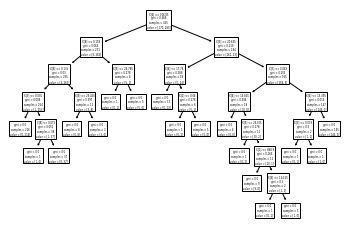

In [39]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation
from sklearn.metrics import confusion_matrix

tree.plot_tree(btree)

y_pred_train = btree.predict(x_train)
y_pred_test = btree.predict(x_test)

# accuracy_train = r2_score(y_train, y_pred_train)
# print("Training Accuracy for Basic Trees Model: ", accuracy_train)

# accuracy_test = r2_score(y_test, y_pred_test)
# print("Testing Accuracy for Basic Trees Model: ", accuracy_test)

# RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
# print("RMSE for Training Data: ", RMSE_train)

# RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
# print("RMSE for Testing Data: ", RMSE_test)*/

cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix: \n", cm )